# datascientist_mook_vol1
## データサイエンティスト養成読本vol.1（Python 機械学習）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## irisデータ読み込み(from pandas repogitory)

In [2]:
import os

iris_pandas_url = "https://raw.githubusercontent.com/pydata/pandas/master/doc/data/iris.data"
iris_data_file_name = "iris.data.csv"
if os.path.exists(iris_data_file_name):
    iris = pd.read_csv(iris_data_file_name)
else:
    iris = pd.read_csv(iris_pandas_url)
    iris.to_csv(iris_data_file_name, index=False)
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Name           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [3]:
setosa = iris[iris.Name == "Iris-setosa"]
versicolor = iris[iris.Name == "Iris-versicolor"]
virginica = iris[iris.Name == "Iris-virginica"]
len(setosa), len(versicolor), len(virginica), 

(50, 50, 50)

In [4]:
iris.pivot_table(index="Name", aggfunc=np.mean)

PetalLength  PetalWidth  SepalLength  SepalWidth
Name                                                             
Iris-setosa            1.464       0.244        5.006       3.418
Iris-versicolor        4.260       1.326        5.936       2.770
Iris-virginica         5.552       2.026        6.588       2.974

In [5]:
pd.concat(
    [
        setosa.sum(), 
        setosa.mean(), setosa.median(),
        setosa.min(), setosa.max(),
        setosa.var(), setosa.std(),
    ], axis=1,
    keys=["sum", "mean", "median", "min", "max", "var", "std"]
)


sum   mean  median  \
Name         Iris-setosaIris-setosaIris-setosaIris-setosaIr...    NaN     NaN   
PetalLength                                               73.2  1.464     1.5   
PetalWidth                                                12.2  0.244     0.2   
SepalLength                                              250.3  5.006     5.0   
SepalWidth                                               170.9  3.418     3.4   

                     min          max       var       std  
Name         Iris-setosa  Iris-setosa       NaN       NaN  
PetalLength            1          1.9  0.030106  0.173511  
PetalWidth           0.1          0.6  0.011494  0.107210  
SepalLength          4.3          5.8  0.124249  0.352490  
SepalWidth           2.3          4.4  0.145180  0.381024

In [6]:
setosa.describe().T

count   mean       std  min    25%  50%    75%  max
SepalLength   50.0  5.006  0.352490  4.3  4.800  5.0  5.200  5.8
SepalWidth    50.0  3.418  0.381024  2.3  3.125  3.4  3.675  4.4
PetalLength   50.0  1.464  0.173511  1.0  1.400  1.5  1.575  1.9
PetalWidth    50.0  0.244  0.107210  0.1  0.200  0.2  0.300  0.6

In [7]:
[
    np.arange(0, 1.1, 0.1),
    np.linspace(0, 1, 11)
]


[array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])]

In [8]:
setosa.describe(include="all", percentiles=np.linspace(0.1, 0.9, 9)).T

count unique          top freq   mean       std  min   10%  20%  \
SepalLength    50    NaN          NaN  NaN  5.006   0.35249  4.3  4.59  4.7   
SepalWidth     50    NaN          NaN  NaN  3.418  0.381024  2.3     3  3.1   
PetalLength    50    NaN          NaN  NaN  1.464  0.173511    1   1.3  1.3   
PetalWidth     50    NaN          NaN  NaN  0.244   0.10721  0.1   0.1  0.2   
Name           50      1  Iris-setosa   50    NaN       NaN  NaN   NaN  NaN   

            30.0%   40%  50%  60%   70%   80%   90%  max  
SepalLength   4.8  4.96    5  5.1   5.1  5.32  5.41  5.8  
SepalWidth    3.2  3.36  3.4  3.5  3.53  3.72   3.9  4.4  
PetalLength   1.4   1.4  1.5  1.5   1.5   1.6   1.7  1.9  
PetalWidth    0.2   0.2  0.2  0.2   0.3   0.3   0.4  0.6  
Name          NaN   NaN  NaN  NaN   NaN   NaN   NaN  NaN

In [9]:
setosa.corr()

SepalLength  SepalWidth  PetalLength  PetalWidth
SepalLength     1.000000    0.746780     0.263874    0.279092
SepalWidth      0.746780    1.000000     0.176695    0.279973
PetalLength     0.263874    0.176695     1.000000    0.306308
PetalWidth      0.279092    0.279973     0.306308    1.000000

In [10]:
setosa.cov()

SepalLength  SepalWidth  PetalLength  PetalWidth
SepalLength     0.124249    0.100298     0.016139    0.010547
SepalWidth      0.100298    0.145180     0.011682    0.011437
PetalLength     0.016139    0.011682     0.030106    0.005698
PetalWidth      0.010547    0.011437     0.005698    0.011494

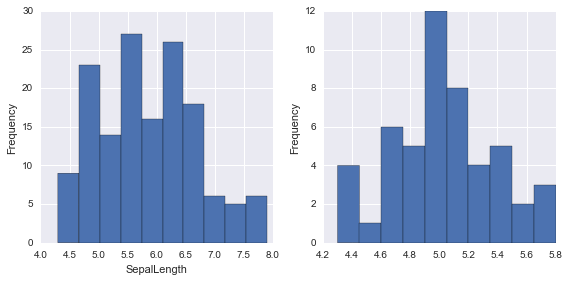

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
iris.SepalLength.plot.hist(ax=axes[0])
axes[0].set_xlabel("SepalLength")

setosa.SepalLength.plot.hist(ax=axes[1])

plt.tight_layout()


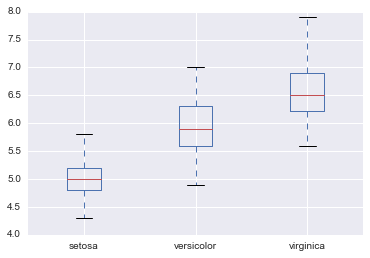

In [12]:
pd.concat(
    {
        "setosa": setosa.SepalLength, 
        "versicolor": versicolor.SepalLength, 
        "virginica": virginica.SepalLength
    }, axis=1
).plot.box()

'dummy'

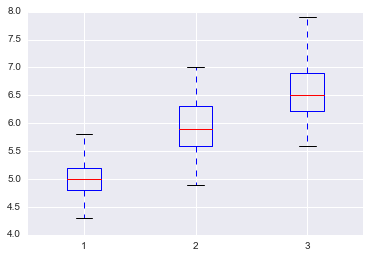

In [13]:
data = [setosa.SepalLength, versicolor.SepalLength, virginica.SepalLength]
plt.boxplot(data)
"dummy"

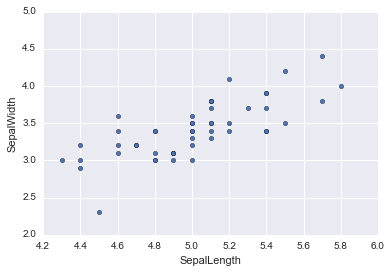

In [14]:
setosa.plot.scatter(x="SepalLength",y="SepalWidth")

In [15]:
setosa.corr().ix["SepalLength", "SepalWidth"]

0.74678037326392688

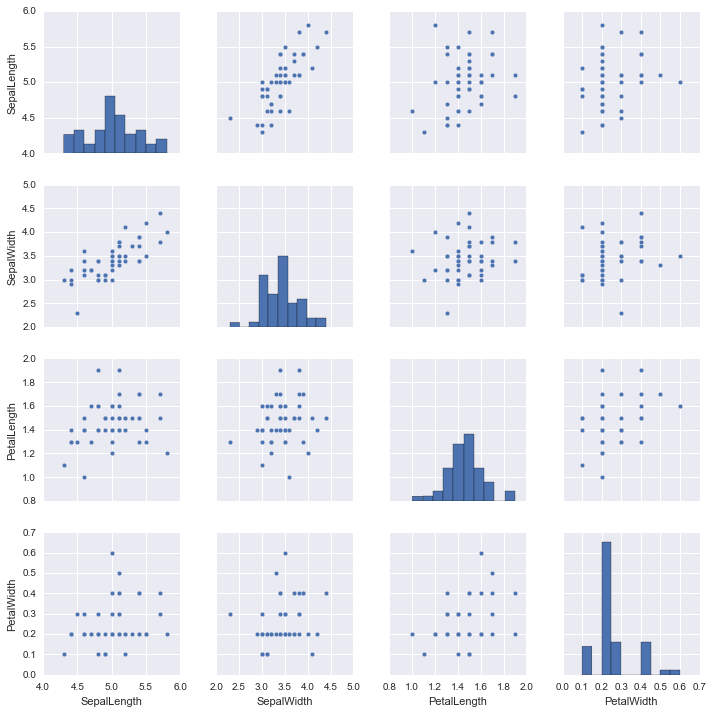

In [16]:
sns.pairplot(setosa)
plt.tight_layout()

(array([[ 0.80723367]]), array([-0.62301173]), 0.55768092589220974)

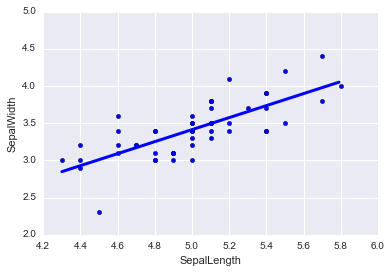

In [17]:
from sklearn import linear_model
np.random.seed(0)

linear_regr = linear_model.LinearRegression()
X = setosa[["SepalLength"]]
Y = setosa[["SepalWidth"]]
linear_regr.fit(X, Y)

plt.scatter(X, Y)
# http://sucrose.hatenablog.com/entry/2013/03/16/162019
px = np.arange(X.min(), X.max(), 0.01)[:, np.newaxis]
py = linear_regr.predict(px)
# print(px.shape, py.shape)

plt.plot(px, py, color="blue", linewidth=3)
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
    
linear_regr.coef_, linear_regr.intercept_, linear_regr.score(X, Y)


In [18]:
linear_regr = linear_model.LinearRegression()
X = setosa[["SepalLength", "PetalLength", "PetalWidth"]]
Y = setosa[["SepalWidth"]]
linear_regr.fit(X, Y)
linear_regr.coef_, linear_regr.intercept_, linear_regr.score(X, Y)


(array([[ 0.79303981, -0.09677873,  0.31530122]]),
 array([-0.48720671]),
 0.56492621264573206)

try({summary(r_data)})
  SepalLength      SepalWidth     PetalLength      PetalWidth   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
              Name   
 Iris-setosa    :50  
 Iris-versicolor:50  
 Iris-virginica :50  
                     
                     
                     

try({source(file='example.R')})

 次のパッケージを付け加えます: ‘dplyr’ 

 以下のオブジェクトは ‘package:stats’ からマスクされています: 

     filter, lag 

 以下のオブジェクトは ‘package:base’ からマスクされています: 

     intersect, setdiff, setequal, union 




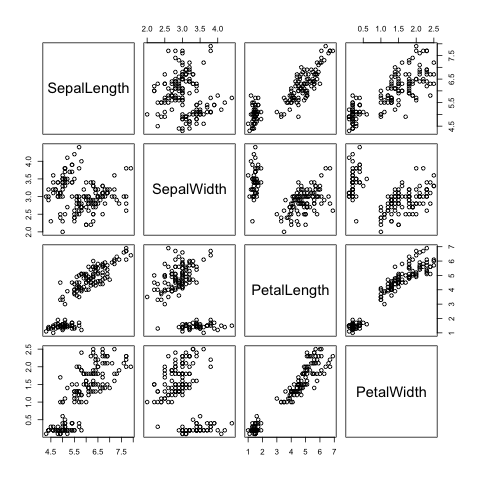

In [20]:
import pyper
import os

image_file_name = "image.png"
r_source = """library(dplyr)
png("{0}", width = 480, height = 480, pointsize = 12, bg = "white", res = NA)
pairs(select(r_data, c(-Name)))
dev.off()
""".format(image_file_name)

r = pyper.R(use_pandas = "True")
r_source_file = "example.R"
r.assign("r_data", iris)
print(r("summary(r_data)"))

with open(r_source_file, "w", encoding="sjis") as f:
    f.write(r_source)
print(r("source(file='{}')".format(r_source_file)))
os.remove(r_source_file)

from IPython.core.display import Image
Image(image_file_name)
#os.remove(image_file_name)


In [25]:
# k-means
def category2int(x):
    category = {
        "Iris-setosa": 0,
        "Iris-versicolor": 1,
        "Iris-virginica": 2,
    }
    return category[x]

cluster_centers_ 
 [[ 5.006       3.418     ]
 [ 6.81276596  3.07446809]
 [ 5.77358491  2.69245283]]
inertia_ 
 37.1237021277
labels_ 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
n_iter_ 
 6


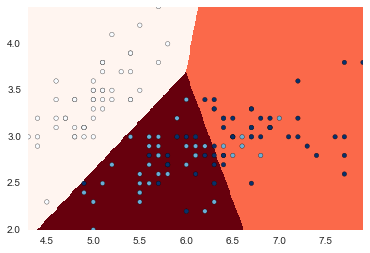

In [45]:
from sklearn.cluster import KMeans

X = iris[["SepalLength", "SepalWidth"]]
kmeansCls = KMeans(n_clusters=3)
kmeansCls.fit(X)

[print(a, "\n", getattr(kmeansCls, a)) for a in dir(kmeansCls) if not a.startswith("_") and a.endswith("_")]

Y = iris.Name.map(category2int)
xMin = X.SepalLength.min()
xMax = X.SepalLength.max()
yMin = X.SepalWidth.min()
yMax = X.SepalWidth.max()
xx, yy = np.meshgrid(np.arange(xMin, xMax, 0.01), np.arange(yMin, yMax, 0.01))
Z = kmeansCls.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Reds)
plt.scatter(X.SepalLength, X.SepalWidth, c=np.array(Y), cmap=plt.cm.Blues)

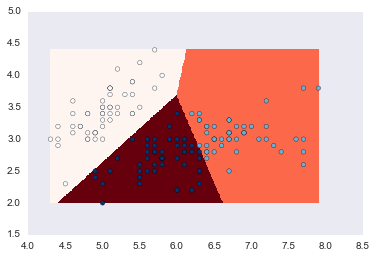

In [47]:
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Reds)
plt.scatter(X.SepalLength, X.SepalWidth, c=kmeansCls.labels_, cmap=plt.cm.Blues)

In [42]:
kmeansCls.predict(np.c_[xx.ravel(), yy.ravel()])

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)